In [1]:
import expectexception
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import warnings; warnings.filterwarnings(action='ignore')
%matplotlib inline
#for Netcdf manipulation
import xarray as xr  
from netCDF4 import Dataset
import netCDF4 as nc

#for array manipulation
import numpy as np
import pandas as pd

#for plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as plt

#for interpolation
from scipy.spatial import cKDTree

import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfea


import netCDF4
import numpy
import xarray
from netCDF4 import Dataset
import datetime
import csv
from scipy import signal

from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from matplotlib import rcParams 
import seaborn as sns

import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfea
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
import pandas as pd
import datetime
import os
from datetime import datetime
import matplotlib.patheffects as PathEffects
import geocat.viz as gv
#from geocat.viz import cmaps as gvcmaps
import cmaps
import geocat.datafiles as gdf
import geocat.viz as gv
import geocat.viz.util as gvutil
from scipy import stats
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
import math

from statistics import mean
from itertools import chain

import numpy as np 
from scipy.stats import t
import pandas
import numpy
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

from statistics import mean
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

In [2]:
##Set up all functions

# -- regional average
def wgt_areaave(indat, latS, latN, lonW, lonE):
  lat=indat.lat
  lon=indat.lon

  if ( ((lonW < 0) or (lonE < 0 )) and (lon.values.min() > -1) ):
     anm=indat.assign_coords(lon=( (lon + 180) % 360 - 180) )
     lon=( (lon + 180) % 360 - 180) 
  else:
     anm=indat

  iplat = lat.where( (lat >= latS ) & (lat <= latN), drop=True)
  iplon = lon.where( (lon >= lonW ) & (lon <= lonE), drop=True)
  
#  print(iplat)
#  print(iplon)
  wgt = np.cos(np.deg2rad(lat))
  odat=anm.sel(lat=iplat,lon=iplon).weighted(wgt).mean(("lon", "lat"), skipna=True)
  return(odat)

def detrend_dim(da,trend, dim, deg=1):
    '''detrend along a single dimension'''
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(trend[dim], p.polyfit_coefficients)
    return da - fit

def mean(x):
    avg = sum(x)/len(x)
    return round(avg,2)

def adjust(ds):
    '''transform the data'''
    z1 = np.array(ds)
    df = pd.DataFrame (z1)
    pred = df.iloc[:,0]
    return pred 

def correlation(x,y,z):
    corr_test = np.corrcoef(x [0:i],y [0:i])[0,1]
    z.append(corr_test)
    
def lowpass_filter (x,y):
    '''fraction of nyquist frequency, here  it is 10 years'''
    fs=1/12/30/24/3600 

    nyquist = fs / 2 # 0.5 times the sampling frequency
    cutoff=x # fraction of nyquist frequency, here  it is 10 years
    b, a = signal.butter(5, cutoff, btype='lowpass') #low pass filter


    dUfilt = signal.filtfilt(b, a, y)
    dUfilt=np.array(dUfilt)
    dUfilt=dUfilt.transpose()
    return dUfilt

def average_every_n_elements(lst, n=12):
    return [sum(lst[i:i+n]) / n for i in range(0, len(lst), n) if len(lst[i:i+n]) == n]

def grap(data):
    df = pd.DataFrame(data, a)
    y = df.groupby(pd.Grouper(freq='1Y')).mean()
    Y = y.iloc[0:30,0]
    #Y = lowpass_filter(0.1,Y)
    #Y = np.insert(Y, 0,1)
    return Y

In [3]:
##Saved path of Channel-wise-based CNN prediction
outdir =  'C:/Users/user/Research/Research Code/CNN/PDO/'
outdir_smooth_pred_CWCNN_PDO = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/pred/'
outdir_smooth_test_CWCNN_PDO = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/test/'
outdir_smooth_valid_CWCNN_PDO= 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/validation/'
outdir_correlation_CWCNN_PDO = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/correlation/'

In [4]:
ifile ='C:/Users/user/Research/Research Code/CNN/PDO/'
ifile_data = 'C:/Users/user/Research/Research Code/CNN/Data/'

In [6]:
##Saved path of CMIP6 simulation
outdir_smooth_pred_MME_PDO =  'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/pred/'
outdir_smooth_test_MME_PDO =  'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/test/'
outdir_correlation_MME_PDO = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/correlation/'

# 3. Plot PDO amplitude

In [7]:
##Imported Channel-wise-based CNN prediction
lead_time = 360
cutoff = 0.05

PDO_cnn = np.loadtxt(outdir_smooth_pred_CWCNN_PDO+'Result_PDO index_pred_cwcnn_smoothed'+str(lead_time)+'.csv', dtype=float)
PDO_cnn = adjust(PDO_cnn[:480])

##Imported CAMS-CSM1-0 simulation
PDO_CAMS_CSM1_0 = np.loadtxt(outdir_smooth_pred_MME_PDO+'Result_PDO index_CAMS-CSM1-0_smoothed.csv', dtype=float)
PDO_CAMS_CSM1_0 = adjust(PDO_CAMS_CSM1_0[:480])


##Import validation data from NCEI PDO index from 1983-2022 
#https://www.ncei.noaa.gov/access/monitoring/pdo/
PDO_ncei = pd.read_excel(ifile_data+'NCEI PDO index _overall.xlsx',header=None,index_col=None,
                      skiprows=985, skipfooter = 0,
                      usecols=[1]  
                     )
PDO_ncei = adjust(PDO_ncei)
temp = PDO_ncei.values
time_revolution = pd.date_range("1983-01-01", periods=480,freq='M')
reference_time = pd.Timestamp("1983-01-01")
PDO_ncei = xr.DataArray(data=temp,dims=["time"],coords=dict( time=time_revolution,reference_time=reference_time,),
                        attrs=dict(description="-",units="-",    ),)

##Smoothed with 10-year low pass
lw_ncei = lowpass_filter(cutoff ,PDO_ncei)
PDO_ncei=adjust(lw_ncei)

In [8]:
#Setup validation period
x_time = pd.date_range('1983-01', '2023-01', freq="M",name='dates')

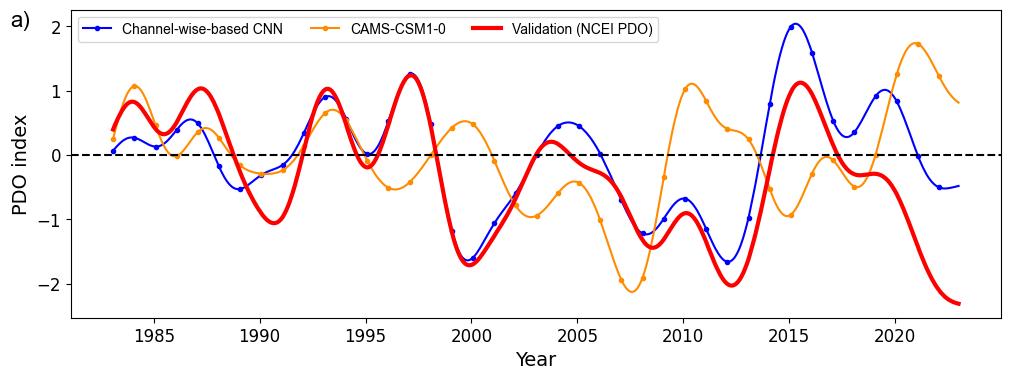

In [9]:
# plotted the time series of smoothed (10-yr low-pass filtered) PDO index graph (Figure 3a))
plt.subplots(figsize=(12, 4))
plt.rcParams["font.family"] = "Arial"

plt.plot(x_time,PDO_cnn ,label='Channel-wise-based CNN', color = 'blue',marker='.',markevery=12)
plt.plot(x_time,PDO_CAMS_CSM1_0 ,label='CAMS-CSM1-0', color = 'darkorange',marker='.',markevery=12)
plt.plot(x_time,PDO_ncei ,label='Validation (NCEI PDO)', color = 'red',linewidth=3)

plt.axhline(y=0, c="black", linestyle = 'dashed' )
plt.legend()
plt.xlabel('Year',fontsize=14)
plt.ylabel('PDO index',fontsize=14)
plt.text(3000,2, "a)",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best', ncol=4,  fontsize=10)

plt.savefig(outdir+'time series of PDO index from 1983-2022'+'.png',bbox_inches='tight')
plt.show()


# END